In [1]:
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

!pip install imblearn

In [2]:
# 한글 깨짐 방지
import matplotlib
import matplotlib.font_manager as fm
# fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'C:/Users/ASIA-19/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

   새벽  아침  오후  저녁  일일 교통량  일일 교통량 평균  일일 속도평균  일일 속도75%  고속도로 교통량  고속도로별 로드킬  \
0   1   0   0   0  670656        207       91       108     72960         59   
1   1   0   0   0  677088        241       94       108     72960         59   
2   0   0   1   0  677088        241       94       108     72960         59   
3   1   0   0   0  676800        245       89       104     72960         59   
4   0   0   1   0  676800        245       89       104     72960         59   

   ...      교통사고비용  위험운전행동  화물_관용  화물_자가용  화물_영업용  화물등록_계  주행거리당 사망수  시도별_진료비  \
0  ...   5245000.0       0   2888  291305   23787  317980       17.6   110704   
1  ...  69085100.0       1   5582  682010  113674  801266        7.4   111105   
2  ...  12993100.0       1   5582  682010  113674  801266        7.4   111105   
3  ...  10490000.0       1   1615  153093   33635  188343        5.0   122906   
4  ...  15735000.0       0   5582  682010  113674  801266        7.4   111105   

   연령별_가해진료비  연령별_피해진료비  
0     

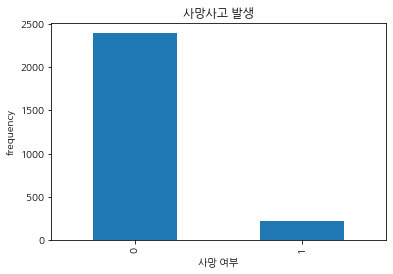

X_train shape: (2090, 28)
X_test shape: (523, 28)
Y_train shape: (2090,)
Y_test shape: (523,)
0    1919
1     171
Name: 사망, dtype: int64
11.222222222222221


In [3]:
#데이터 로드
df = pd.read_excel('D:/work/python/a-truck-accident/data/cleandata_final_0624.xlsx')
print(df.head())

#결측치 확인
print(df.isnull().sum())

# 데이터 불균형 확인
pd.value_counts(df['사망']).plot.bar()
plt.title('사망사고 발생')
plt.xlabel('사망 여부')
plt.ylabel('frequency')
plt.show()

# 독립변수(특징), 종속변수(라벨) 나누기
X = df.drop(['사망', '교통사고비용', '부상자수'], axis=1)
Y = df['사망']

# 훈련셋, 검증셋 나누기
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  stratify=Y)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

# 데이터 불균형 확인
print(Y_train.value_counts())
# 0 673
# 1 67

# 불균형 비율 계산
print(Y_train.value_counts().iloc[0] / Y_train.value_counts().iloc[-1])
# 10.044776119402986

In [4]:
# 오버샘플링
print('Before OverSampling, counts of label "1": {}'.format(sum(Y_train==1)))
print('Before OverSampling, counts of label "0": {} \n'.format(sum(Y_train==0)))

## SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=3)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
X_train_res = pd.DataFrame(X_train_res, columns=X.columns)
Y_train_res = pd.Series(Y_train_res)

print('After OverSampling, X_train shape: {}'.format(X_train_res.shape))
print('After OverSampling, Y_train shape: {} \n'.format(Y_train_res.shape))

print('After OverSampling, counts of label "1": {}'.format(sum(Y_train_res==1)))
print('After OverSampling, counts of label "0": {} \n'.format(sum(Y_train_res==0)))

print('Oversampled dataset shape %s' % Counter(Y_train))
print('Oversampled dataset shape %s' % Counter(Y_train_res))


Before OverSampling, counts of label "1": 171
Before OverSampling, counts of label "0": 1919 

After OverSampling, X_train shape: (3838, 28)
After OverSampling, Y_train shape: (3838,) 

After OverSampling, counts of label "1": 1919
After OverSampling, counts of label "0": 1919 

Oversampled dataset shape Counter({0: 1919, 1: 171})
Oversampled dataset shape Counter({0: 1919, 1: 1919})


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1919
           1       0.84      0.87      0.85      1919

    accuracy                           0.85      3838
   macro avg       0.85      0.85      0.85      3838
weighted avg       0.85      0.85      0.85      3838

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       480
           1       0.13      0.37      0.20        43

    accuracy                           0.75       523
   macro avg       0.53      0.58      0.53       523
weighted avg       0.87      0.75      0.80       523

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.08      1.00      0.15        43

    accuracy                           0.08       523
   macro avg       0.04      0.50      0.08       523
weighted avg       0.01      0.08      0.01       523

roc_score_train : 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_18156/176

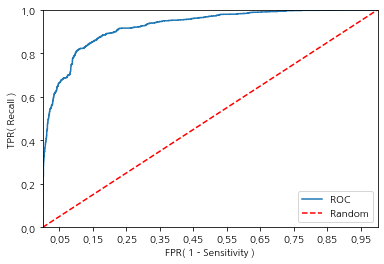

C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_18156/1761398542.py:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


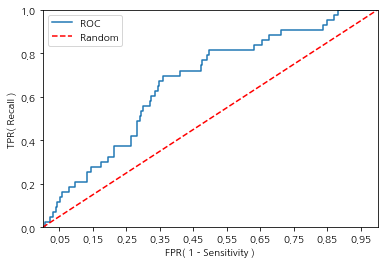

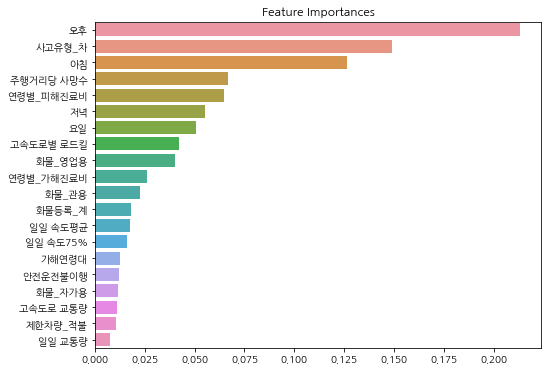

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score


# # 1.RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# # 기술 속성(descriptive features)
# X = df.drop(['사망', '부상자수', '교통사고비용'], axis=1)
# # # 대상 속성(target feature)
# Y = df['사망']
#
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
# # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
#
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

# #데이터를 표준화 시킴
# from sklearn.preprocessing import StandardScaler


# #훈련용 뿐만 아니라 테스트용도 같이

# ss = StandardScaler()
# ss.fit(X_train)
# train_scaled = ss.transform(X_train)
# test_scaled = ss.transform(X_test)


# ▶ stratify='Y' 옵션 결과 확인
pd.Series(Y_train_res).value_counts()

125 / (1271 + 125)

# ▶ stratify='Y' 옵션 결과 확인
pd.Series(Y_test).value_counts()

42 / (424 + 42)

# · 모델 학습 및 평가
# 모델을 학습하고 예측을 수행하여 성능을 평가


# ▶ 모델 학습
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(random_state=10000, max_depth=3, n_estimators=125)
rfc.fit(X_train_res, Y_train_res)

# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
Y_pred_train = rfc.predict(X_train_res)
Y_pred_test = rfc.predict(X_test)

print(classification_report(Y_train_res, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

pd.Series(Y_pred_train).value_counts()

# ▶ Q. [Test] Precision = 0.60, threshold = ? ↓(base:0.5), Recall = ?
pd.Series(Y_pred_test).value_counts()

from sklearn.preprocessing import Binarizer

# ▶ threshold를 증가시키면, 진짜 정답일 데이터를 예측할 것이므로 precision 값이 증가 (※ 예측하는 개수 감소)
# ▶ threshold를 감소시키면, 조금 이라도 가능성이 있는 정답을 더 많이 예측하므로 recall 값이 증가 (※ 예측하는 개수 증가)
# Input_threshold = 0.405
Input_threshold = 0.100

pred_proba_test = rfc.predict_proba(X_test)[:, 1].reshape(-1, 1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# ▶ 성능평가 확인
print(classification_report(Y_test, custom_predict))

pd.Series(custom_predict.reshape(-1)).value_counts()

# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

Y_pred_train_proba = rfc.predict_proba(X_train_res)[:, 1]
Y_pred_test_proba = rfc.predict_proba(X_test)[:, 1]

roc_score_train = roc_auc_score(Y_train_res, Y_pred_train_proba)
roc_score_test = roc_auc_score(Y_test, Y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

from sklearn.metrics import roc_curve


def roc_curve_plot(Y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


roc_curve_plot(Y_train_res, Y_pred_train_proba)

roc_curve_plot(Y_test, Y_pred_test_proba)

# · 중요 변수 파악
# Feature IMP 분석을 통한 중요변수 파악


import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train_res.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# · 모델 Save and Read
# 최종 모델을 저장 및 다시 불러오기


# import pickle
# # 모델 저장
# saved_model = pickle.dumps(rfc)

# # 모델 Read
# clf_from_pickle = pickle.loads(saved_model)